In [1]:
from load_data import load_data, pad
from make_datasets import make_dataset
from mlp import *


In [2]:
recordings, valence = load_data()

  0%|          | 0/10557 [00:00<?, ?it/s]

100%|██████████| 10557/10557 [00:06<00:00, 1553.55it/s]


In [3]:
padded_data = pad(recordings)


In [4]:
train_loader, test_loader, validation_loader = make_dataset(padded_data, valence)

## Example: MLP with ADAM

ModuleList(
  (0): Linear(in_features=91000, out_features=1024, bias=True)
  (1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): Dropout(p=0.001, inplace=False)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=1024, bias=True)
  (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Dropout(p=0.001, inplace=False)
  (7): ReLU()
  (8): Linear(in_features=1024, out_features=1024, bias=True)
  (9): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Dropout(p=0.001, inplace=False)
  (11): ReLU()
  (12): Linear(in_features=1024, out_features=1, bias=True)
)
Epoch [1/2], Loss: 4.1272
Epoch [2/2], Loss: 6.8596
Mean Squared Error on Test Set: 5.483482013131748
Accuracy on Test Set: 2%
Predicted Labels: [4.0510535, 0.49994716, 5.4212065, 5.0174885, 5.06616, 5.2995687, 5.5294366, 5.259653, 5.2602587, 4.3849363, 5.1133337, 4.9215465, 5.551448, 5.2572074, 5.003031, 4.86

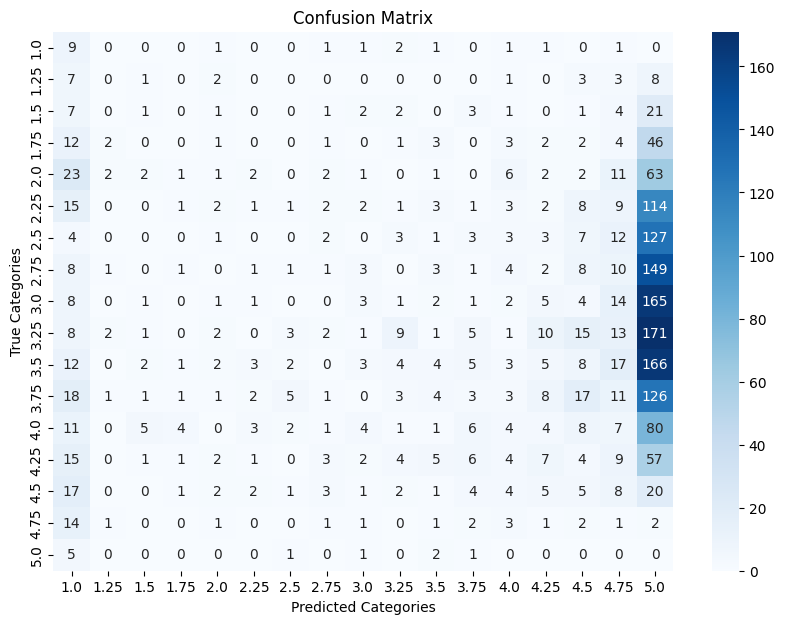

In [5]:

# Initialize the model
input_size = 91000 # the longest input is 175000
hidden_size = [1024,1024,1024]
output_size = 1  # Regression problem
activation_function = nn.ReLU
num_epochs = 2

# Create the model
modelADAM = MLP(input_size, hidden_size, output_size, activation_function)
print(modelADAM.layers)
optimizer = torch.optim.Adam(modelADAM.parameters(), lr=0.0005)

# Move everything to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
modelADAM.to(device)

# Train the model
train_model(modelADAM, optimizer, num_epochs=num_epochs, train_loader=train_loader, max_length=91000)

# Evaluate the model
evaluate_model(modelADAM, test_loader)



Mean Squared Error on Test Set: 5.283882530293176
Accuracy on Test Set: 2%
Predicted Labels: [5.402577, 0.5962596, 4.818832, 3.3901796, 5.4453797, 4.310246, 5.6019855, 5.118732, 0.15872833, -0.69416296, 5.4891853, 2.1210773, 5.327723, 4.830919, 5.0101957, 5.2822814, 4.0945053, 5.191433, 5.587759, 5.5351534, 2.960332, 4.121465, 5.448057, 5.2829843, 5.3319774, 5.5004687, 0.6065893, 5.425847, 2.0549572, 4.767369, 5.2641044, 4.0106883, 4.7724237, 4.54874, 5.35699, 5.369501, 5.4764895, 5.215035, 3.6188138, 5.5229535, 5.386582, 5.343526, 5.5132923, 2.9864807, -0.45167607, 5.3508344, 1.7258224, 5.338975, 4.681635, 5.550948, 5.4129324, 5.164118, 4.757396, 5.136471, 5.434625, 5.492128, 5.3430552, 5.334353, 5.039349, 1.3880177, 1.4722835, 4.233105, 5.278351, 5.310217, 5.261574, 5.5154853, 3.964941, 5.4556355, 5.2609735, 5.385448, 4.9900618, 5.491936, 5.385045, 4.4763336, 5.2893863, 1.5392036, 0.6425849, 5.175439, 5.001015, 5.1972156, 5.561236, 4.359272, 4.9270167, 5.3741555, 5.0877037, 4.8133316

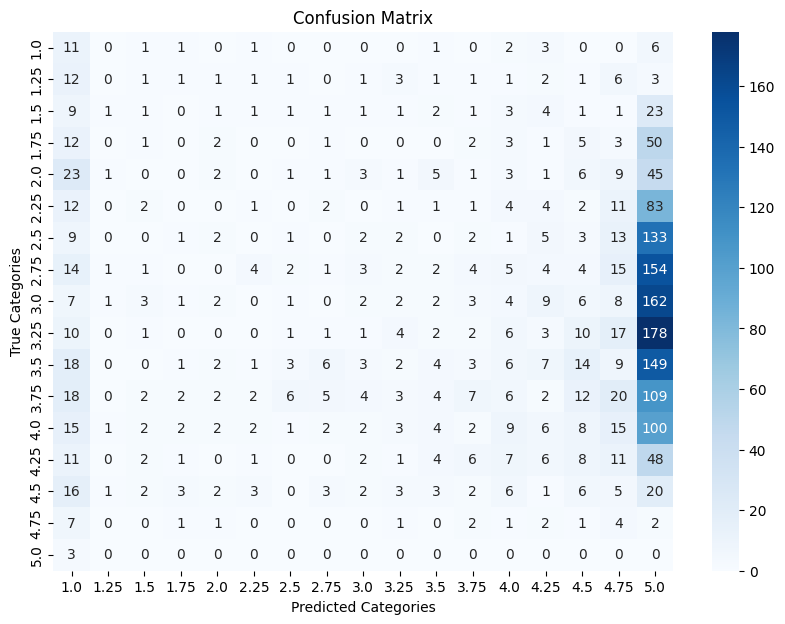

In [6]:
evaluate_model(modelADAM, validation_loader)